In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm
%matplotlib inline

In [2]:
playlist1_df = pd.read_csv("Datasets/MusicTaste/SumaSpotifyMusicTaste.csv")
playlist1_df.shape

(256, 18)

In [3]:
playlist2_df = pd.read_csv("Datasets/MusicTaste/TestSpotifyMusicTaste.csv")
playlist2_df.shape

(234, 18)

In [4]:
playlist1_df.head()

,Unnamed: 0,id,name,popularity,track_number,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists,album,release_date
0,0,499rs8fMaltXk2BOlq9P0m,"Ye Chota Nuvvunna (From ""Saaho"") (feat. Tulsi ...",54.0,1.0,spotify:track:499rs8fMaltXk2BOlq9P0m,0.725,0.675,-6.225,0.0444,0.1160,0.000044,0.0990,0.6410,92.017,"Guru Randhawa, Tulsi Kumar, Haricharan","Ye Chota Nuvvunna (From ""Saaho"")",2019-08-02
1,1,2FPYJZygSLhD9RdPvEnBha,Nee Choopule,52.0,2.0,spotify:track:2FPYJZygSLhD9RdPvEnBha,0.573,0.350,-8.126,0.0260,0.2620,0.000017,0.0976,0.0386,90.925,"Haricharan, K. S. Chithra",Endukante Premanta,2012-04-29
2,2,37qEgpLxOJN2jpxo2yEl64,Sundari,39.0,2.0,spotify:track:37qEgpLxOJN2jpxo2yEl64,0.866,0.860,-3.662,0.0552,0.1850,0.000086,0.0629,0.8990,101.982,Jaspreet Jasz,Khaidi No 150,2017-01-05
3,3,008lRa3qOTxsZE3UeKW8yp,You & Me,46.0,3.0,spotify:track:008lRa3qOTxsZE3UeKW8yp,0.840,0.715,-4.307,0.0836,0.2000,0.014500,0.1030,0.7360,118.988,"Hariharan, Shreya Ghoshal",Khaidi No 150,2017-01-05
4,4,6lINfLttHSl6Q0uGyCFVsw,Allegro,44.0,5.0,spotify:track:6lINfLttHSl6Q0uGyCFVsw,0.776,0.804,-3.274,0.1100,0.0526,0.013100,0.0707,0.7600,105.051,"Devi Sri Prasad, Rita",Kanthaswamy (Original Motion Picture Soundtrack),2009-05-07


In [5]:
playlist2_df.head()

,Unnamed: 0,id,name,popularity,track_number,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists,album,release_date
0,188,3ipHW5XTIQ5CtNWEurXuOI,Davva Davva,17,1,spotify:track:3ipHW5XTIQ5CtNWEurXuOI,0.745,0.703,-5.947,0.0440,0.18000,0.000312,0.0426,0.660,90.025,Armaan Malik,Rider,3/10/2022
1,345,4Enr48UdAmBWn6PLgSLsqS,Anaganaga,20,1,spotify:track:4Enr48UdAmBWn6PLgSLsqS,0.753,0.530,-8.851,0.0429,0.40900,0.007080,0.1340,0.425,130.020,Ambika Sashital,Goodachari,7/23/2018
2,492,0kz3Bh09Li3wtcreZV3BKM,Follow Follow,22,1,spotify:track:0kz3Bh09Li3wtcreZV3BKM,0.829,0.781,-4.137,0.0770,0.31700,0.016500,0.0866,0.965,94.017,Devi Sri Prasad,Nannaku Prematho (Original Motion Picture Soun...,12/25/2015
3,406,0MqVQMkcEdJQ2cnFOOdrSk,Koova,29,1,spotify:track:0MqVQMkcEdJQ2cnFOOdrSk,0.940,0.696,-5.991,0.1130,0.05510,0.000007,0.6120,0.782,126.923,"Karthik, Chinna Ponnu",Ondraga Originals,1/14/2018
4,425,0LMvYrD1JpHavQcyRoSaqZ,Beat In My Heart,33,1,spotify:track:0LMvYrD1JpHavQcyRoSaqZ,0.706,0.832,-5.260,0.0750,0.00711,0.000038,0.0863,0.565,128.598,"Nagoor Babu, Gayathri",Gulabi,2/19/1995


equaling data

In [6]:
playlist1_df.count

<bound method DataFrame.count of      Unnamed: 0                      id  \
0             0  499rs8fMaltXk2BOlq9P0m   
1             1  2FPYJZygSLhD9RdPvEnBha   
2             2  37qEgpLxOJN2jpxo2yEl64   
3             3  008lRa3qOTxsZE3UeKW8yp   
4             4  6lINfLttHSl6Q0uGyCFVsw   
..          ...                     ...   
251         587  6rji5mwjuHRuhozNhn8DG8   
252         588  7zEqY4oGrTVOx85VlRSymi   
253         589  05dYneZZZ2mytSmnsvzFoW   
254         590  7crGzxRqI5pMZAjZgF9uu2   
255         591  5fqsWynhQRpoIVeRfRu4yQ   

                                                  name  popularity  \
0    Ye Chota Nuvvunna (From "Saaho") (feat. Tulsi ...        54.0   
1                                         Nee Choopule        52.0   
2                                              Sundari        39.0   
3                                             You & Me        46.0   
4                                              Allegro        44.0   
..                            

In [7]:
playlist2_df.count

<bound method DataFrame.count of      Unnamed: 0                      id                name  popularity  \
0           188  3ipHW5XTIQ5CtNWEurXuOI         Davva Davva          17   
1           345  4Enr48UdAmBWn6PLgSLsqS           Anaganaga          20   
2           492  0kz3Bh09Li3wtcreZV3BKM       Follow Follow          22   
3           406  0MqVQMkcEdJQ2cnFOOdrSk               Koova          29   
4           425  0LMvYrD1JpHavQcyRoSaqZ    Beat In My Heart          33   
..          ...                     ...                 ...         ...   
229         431  5PXmfhFNAxiqK86Xknc1HB           Darlingey          45   
230         432  4KDq9bn0wdEbIFQDi1CGgj         Apudo Ipudo          61   
231         500  2WO5nzB7QtKn9ZRc9Jkalt        Annul Maelae          64   
232         161  5A6cWSeDqJqMwt2ylrVHko  Naan Dhaan Da Mass          48   
233         474  4PML5RtrVcYAwTTS46otXB         Vaathi Raid          62   

     track_number                                   uri  danceabil

In [8]:
# Create a dictionary in which the keys are the artists of my list and the values are the total of songs for each singer or group.
my_dict = dict(playlist1_df.artists.value_counts())
my_dict

{'Anirudh Ravichander': 9,
 'S. P. Balasubrahmanyam, K. S. Chithra': 3,
 'Sid Sriram': 3,
 'Karthik': 3,
 'Karthik, Chinmayi': 3,
 'Yazin Nizar': 3,
 'Guru Randhawa, Tulsi Kumar, Haricharan': 2,
 'Prasanna.R, Hariharan, Mahathi': 2,
 'Bombay Jayashri': 2,
 'Dhibu Ninan Thomas, Kapil Kapilan': 2,
 'Anirudh Ravichander, Jonita Gandhi': 2,
 'Shweta Mohan': 2,
 'Nikhita Gandhi': 2,
 'Rahul Nambiar': 2,
 'Devi Sri Prasad': 2,
 'Anirudh Ravichander, Dhanush': 2,
 'Karthik, K. S. Chithra': 2,
 'Andrea Jeremiah': 2,
 'Chinmayi': 2,
 'Blaaze, Ranina Reddy, Devi Sri Prasad': 1,
 'Sathyaprakash': 1,
 'Sid Sriram, Shashaa Tirupati': 1,
 'Karthik, Chinna Ponnu': 1,
 'Narendra': 1,
 'Sanjith Hegde, Karthik': 1,
 'Shahil Hada, Chinmayi': 1,
 'Anurag Kulkarni': 1,
 'Anurag Kulkarni, Mickey J. Meyer': 1,
 'Sid Sriram, Jonita Gandhi': 1,
 'Harris Jayaraj, Shail Hada, Sudha Ragunathan, Andrea Jeremiah': 1,
 'Leon James, Jonita Gandhi': 1,
 'A.R. Rahman, Jonita Gandhi, Hriday Gattani': 1,
 'Tippu, Salinis

In [9]:
# Create a temporary subset
temp_subset = playlist1_df

In [10]:
for k,v in my_dict.items(): 
    if v > 200 :
        drop_rows = 150
        drop_indexes_array = df_jhon[df_jhon.artist == k].sample(n = drop_rows).index
        temp_subset = temp_subset.drop(drop_indexes_array)
    elif v == 143 or v == 133 or v == 134:
        drop_rows = 60
        drop_indexes_array = df_jhon[df_jhon.artist == k].sample( n = drop_rows).index
        temp_subset = temp_subset.drop(drop_indexes_array)
    elif v ==178:
        drop_rows = 100
        drop_indexes_array = df_jhon[df_jhon.artist == k].sample(n = drop_rows).index
        temp_subset = temp_subset.drop(drop_indexes_array)

playlist1_df = temp_subset

In [11]:
playlist1_df.artists.count()

256

In [12]:
# Setting new column to identify the users
playlist1_df['who'] = 1
playlist2_df['who'] = 2

In [13]:
# Combine both data frames 
df_couple = playlist1_df.append(playlist2_df)
df_couple.reset_index(inplace= True)
df_couple.drop('index', axis = 1, inplace= True)
df_couple.head()

,Unnamed: 0,id,name,popularity,track_number,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artists,album,release_date,who
0,0,499rs8fMaltXk2BOlq9P0m,"Ye Chota Nuvvunna (From ""Saaho"") (feat. Tulsi ...",54.0,1.0,spotify:track:499rs8fMaltXk2BOlq9P0m,0.725,0.675,-6.225,0.0444,0.1160,0.000044,0.0990,0.6410,92.017,"Guru Randhawa, Tulsi Kumar, Haricharan","Ye Chota Nuvvunna (From ""Saaho"")",2019-08-02,1
1,1,2FPYJZygSLhD9RdPvEnBha,Nee Choopule,52.0,2.0,spotify:track:2FPYJZygSLhD9RdPvEnBha,0.573,0.350,-8.126,0.0260,0.2620,0.000017,0.0976,0.0386,90.925,"Haricharan, K. S. Chithra",Endukante Premanta,2012-04-29,1
2,2,37qEgpLxOJN2jpxo2yEl64,Sundari,39.0,2.0,spotify:track:37qEgpLxOJN2jpxo2yEl64,0.866,0.860,-3.662,0.0552,0.1850,0.000086,0.0629,0.8990,101.982,Jaspreet Jasz,Khaidi No 150,2017-01-05,1
3,3,008lRa3qOTxsZE3UeKW8yp,You & Me,46.0,3.0,spotify:track:008lRa3qOTxsZE3UeKW8yp,0.840,0.715,-4.307,0.0836,0.2000,0.014500,0.1030,0.7360,118.988,"Hariharan, Shreya Ghoshal",Khaidi No 150,2017-01-05,1
4,4,6lINfLttHSl6Q0uGyCFVsw,Allegro,44.0,5.0,spotify:track:6lINfLttHSl6Q0uGyCFVsw,0.776,0.804,-3.274,0.1100,0.0526,0.013100,0.0707,0.7600,105.051,"Devi Sri Prasad, Rita",Kanthaswamy (Original Motion Picture Soundtrack),2009-05-07,1


Comparing means

In [14]:
# Create data frame with features
def features(df,who):
    if who == 'both':
         features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'who']]         
    elif who == 0 or who == 1:   
          features = df.loc[df.who == who,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]           
    else:
        return 'Error'
    return features

In [15]:
features1_df = features(df_couple, 1)
features2_df = features(df_couple,0)
features1_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.1160,0.725,0.675,0.000044,0.0990,0.0444,0.6410
1,0.2620,0.573,0.350,0.000017,0.0976,0.0260,0.0386
2,0.1850,0.866,0.860,0.000086,0.0629,0.0552,0.8990
3,0.2000,0.840,0.715,0.014500,0.1030,0.0836,0.7360
4,0.0526,0.776,0.804,0.013100,0.0707,0.1100,0.7600


In [16]:
playlist2_df.artists.value_counts()

Anirudh Ravichander                                        9
Karthik                                                    3
Yazin Nizar                                                3
S. P. Balasubrahmanyam, K. S. Chithra                      3
Chinmayi                                                   2
                                                          ..
Sanjith Hegde                                              1
Tippu, Priya                                               1
Sricharan Pakala, Yamini Ghantasala                        1
Anirudh Ravichander, Shruti Haasan, Shakthisree Gopalan    1
Anirudh Ravichander, Arivu                                 1
Name: artists, Length: 209, dtype: int64

In [17]:
playlist1_df.artists.value_counts()

Anirudh Ravichander                                    9
S. P. Balasubrahmanyam, K. S. Chithra                  3
Sid Sriram                                             3
Karthik                                                3
Karthik, Chinmayi                                      3
                                                      ..
Vishal-Shekhar, Benny Dayal, Jaideep Sahni             1
Salimâ€“Sulaiman, Benny Dayal, Amitabh Bhattacharya    1
Pritam, Benny Dayal, Shefali Alvares                   1
Benny Dayal, Anmol Malik, Anu Malik                    1
Anirudh Ravichander, Shruti Haasan                     1
Name: artists, Length: 225, dtype: int64

In [18]:
total_songs1 = playlist1_df.artists.count()
total_songs2 = playlist1_df.artists.count()
print(f'Total of songs:\nPerson 1: {playlist1_df.artists.count()}\nPerson 2:{playlist2_df.artists.count()}')

Total of songs:
Person 1: 256
Person 2:234


Data Analysis

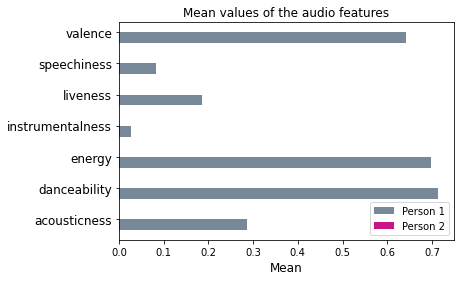

In [19]:
# Number of features
N = len(features1_df.mean())
# Array with the number of features
ind = np.arange(N) 

width = 0.35  
#Bar plot with my list
plt.barh(ind, features1_df.mean() , width, label='Person 1', color = 'lightslategray')
#Bar plot with her list
plt.barh(ind + width, features2_df.mean(), width, label='Person 2', color = 'mediumvioletred')

#X- label
plt.xlabel('Mean', fontsize = 12)
# Title
plt.title('Mean values of the audio features')
#Vertical ticks
plt.yticks(ind + width / 2, (list(features2_df)[:]), fontsize = 12)
#legend
plt.legend(loc='best')
# Figure size
plt.rcParams['figure.figsize'] =(8,8)
# Set style
style.use("ggplot")

plt.show()

TypeError: object of type 'numpy.float64' has no len()

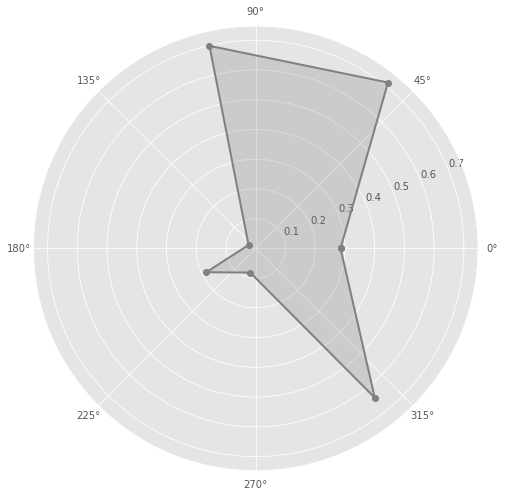

In [24]:
labels= list(features1_df)[:]
stats= features1_df.mean().tolist()
stats2 = features2_df.mean().tolist()

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
stats = np.concatenate((stats,[stats[0]]))
stats2 = np.concatenate((stats2,[stats2[0]])) 
angles = np.concatenate((angles,[angles[0]]))

#Size of the figure
fig= plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Person 1", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(7* 180/np.pi, labels , fontsize = 13)
#ax.set_thetagrids(7, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Person 2", color = 'm')
ax.fill(angles, stats2, alpha=0.25, facecolor='m' )
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [25]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()

NameError: name 'music_feature' is not defined

<Figure size 864x576 with 0 Axes>